**EXPLORATORY DATA ANALYSIS ON ENHANCED_FERVER_RECOMMENDTATION DATASET**

**Importing relevant**  **libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('enhanced_fever_medicine_recommendation.csv')

**Loading the dataset into a pandas dataframe**

In [9]:
# Load the dataset
file_path = "enhanced_fever_medicine_recommendation.csv"
df = pd.read_csv(file_path)

**Displaying basic dataset info**

In [10]:
# Display basic information about the dataset
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       1000 non-null   o

None

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


**Checking for missing values**

In [11]:
### Handling Missing Values ###
# Checking for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

,0
Previous_Medication,237


 **Handling Missing Values**  
   - Columns **"Body_Temperature"**, **"Age"**, and **"Heart_Rate"** had missing values, which were filled with their respective **median values**.  
   - Categorical columns **"Gender"**, **"Diet_Type"**, and **"Symptoms"** had missing values, replaced with the **most frequent value (mode)**.

In [12]:
# Filling missing values
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-12-6589bcd8156a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-12-6589bcd8156a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**Verifying for any missing values**

In [13]:
# Verify missing values are handled
display(df.isnull().sum())

,0
Temperature,0
Fever_Severity,0
Age,0
Gender,0
BMI,0
Headache,0
Body_Ache,0
Fatigue,0
Chronic_Conditions,0
Allergies,0


**Summary statistics for numerical values of the dataset**

In [14]:
### Univariate Analysis ###
# Summary statistics for numerical variables
numerical_summary = df.describe()
display(numerical_summary)

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,38.09890,51.152000,26.44320,60.594400,248.493000,80.14400
std,1.13887,28.873354,4.90115,17.058475,143.705244,11.79196
min,36.00000,1.000000,18.00000,30.000000,0.000000,60.00000
25%,37.20000,26.000000,22.40000,46.600000,127.750000,70.00000
50%,38.20000,51.000000,26.50000,60.950000,247.500000,80.00000
75%,39.10000,76.000000,30.52500,74.725000,375.250000,90.00000
max,40.00000,100.000000,35.00000,90.000000,499.000000,100.00000


**Univariate Analysis for categorical data**

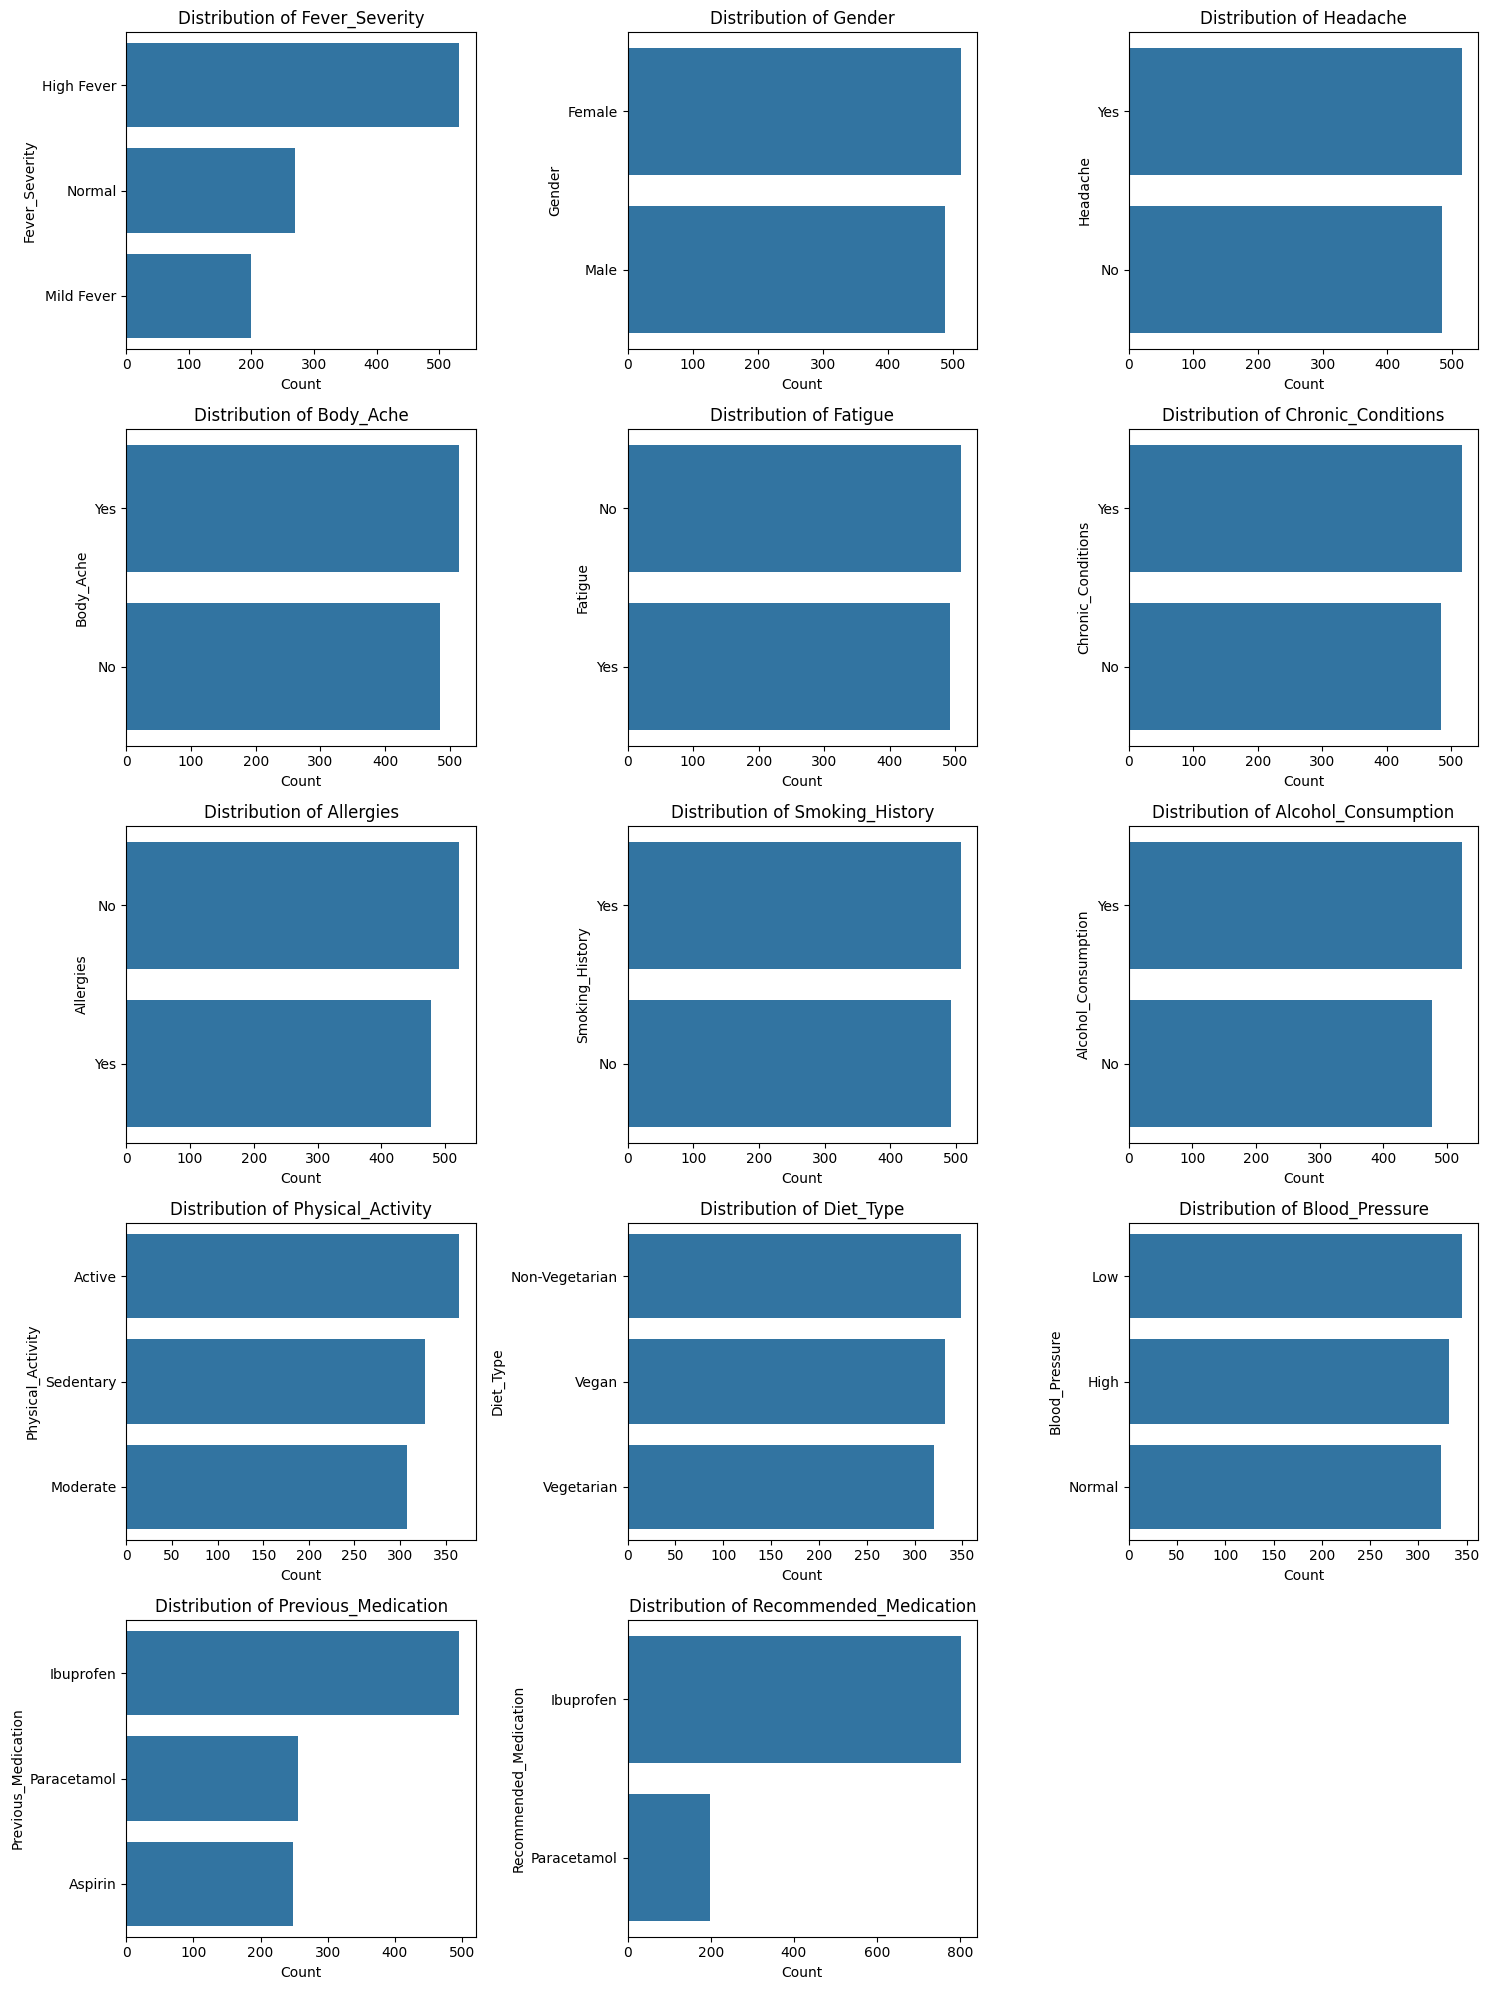

In [15]:
# Count plots for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 3, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
plt.tight_layout()
plt.show()

**univariate analysis for numerical data**

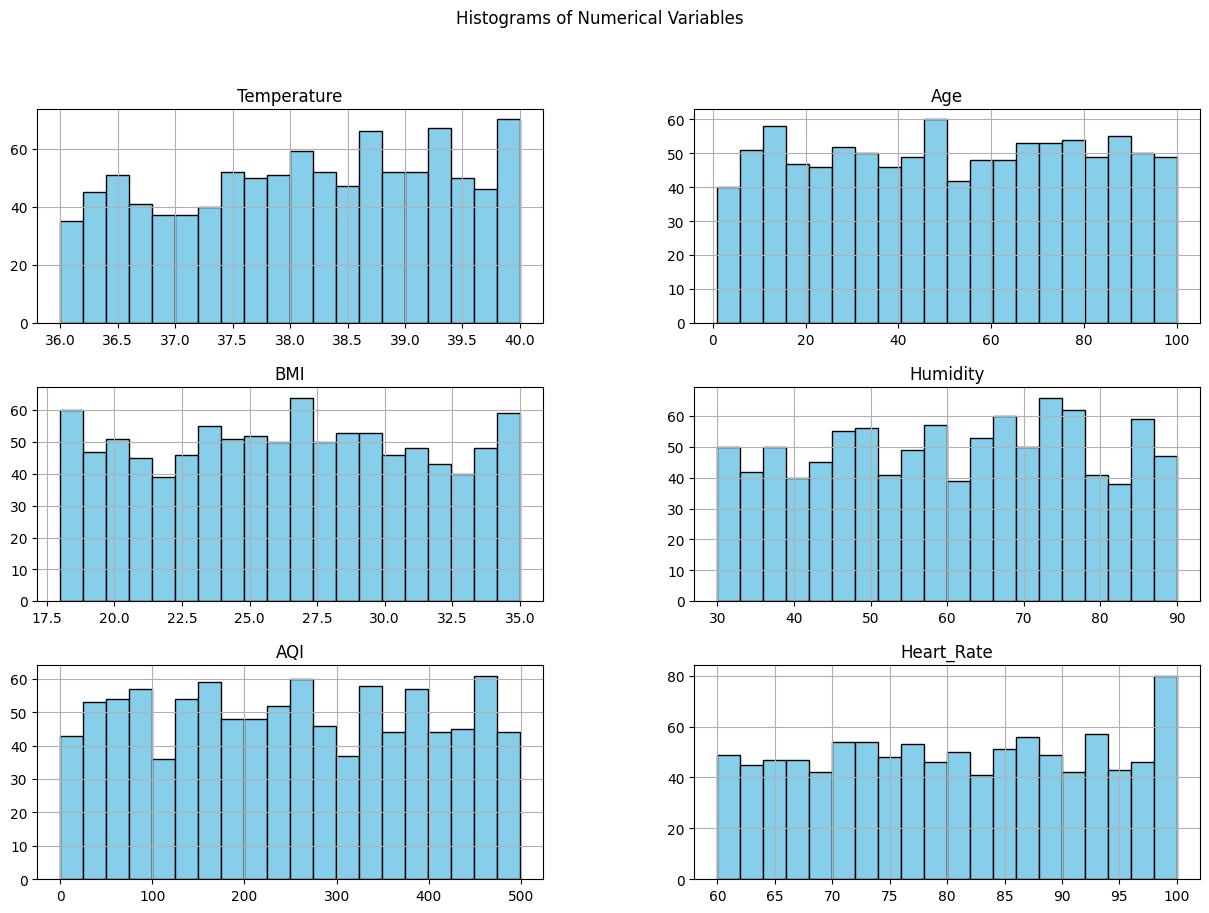

In [16]:
# Histograms for numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables")
plt.show()

**Multivariate Analysis**

**Correlation Matrix**

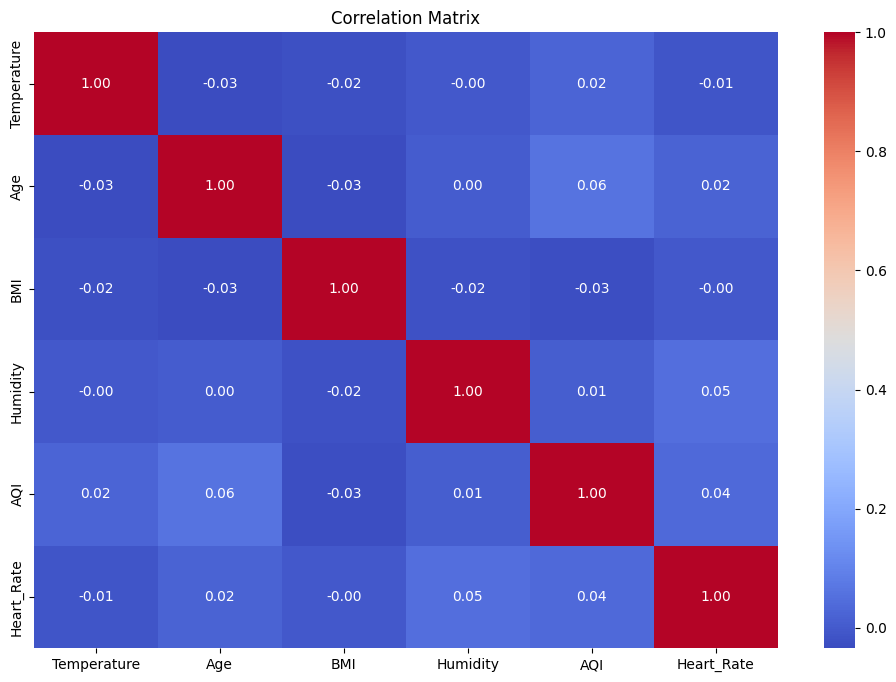

In [17]:
### Multivariate Analysis ###
# Correlation matrix for numerical variables
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**Box Plot on fever severiety**

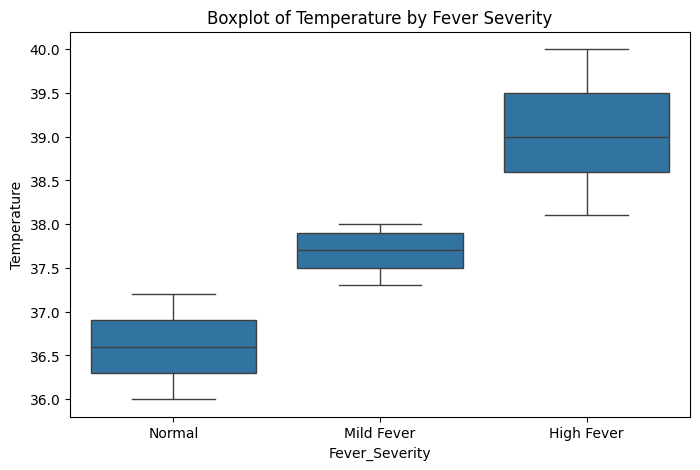

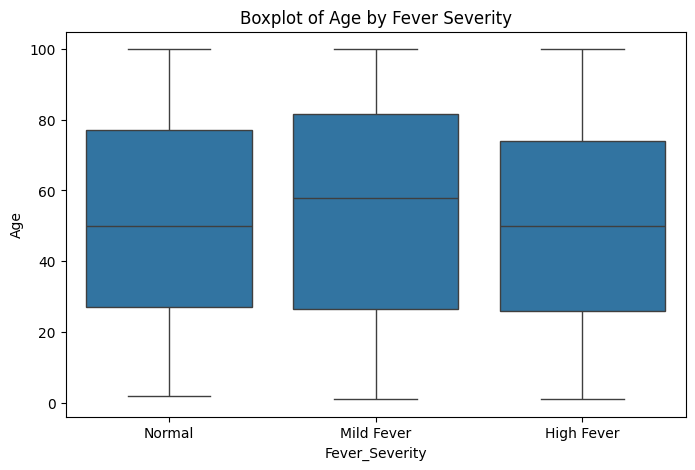

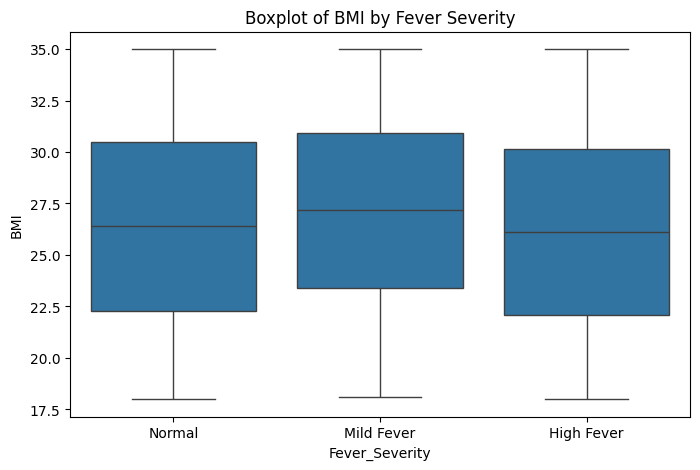

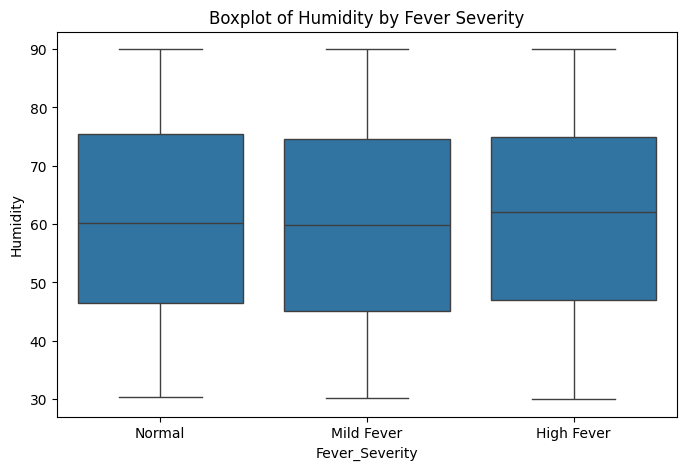

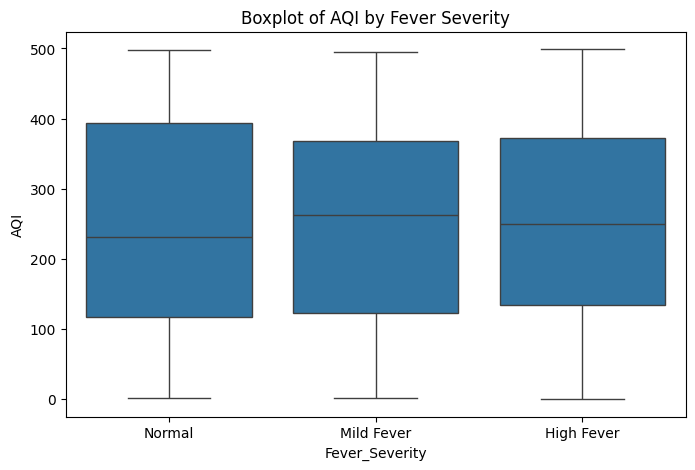

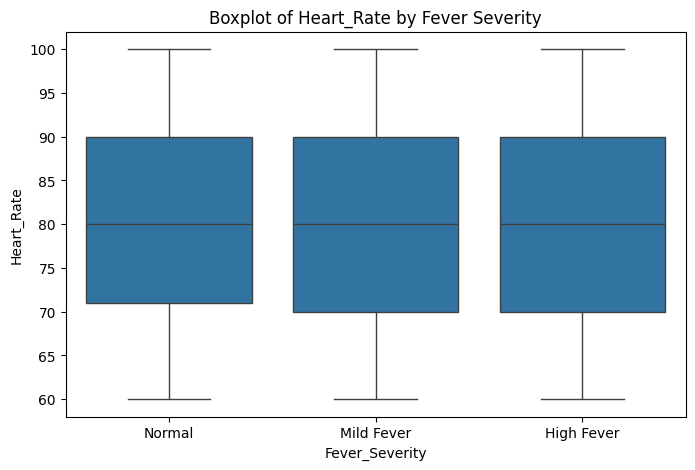

In [32]:
# Box plots for numerical variables across Fever Severity
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Fever_Severity'], y=df[col])
    plt.title(f'Boxplot of {col} by Fever Severity')
    plt.show()

**Countplots on relation of fever severity with Gender and Diet **

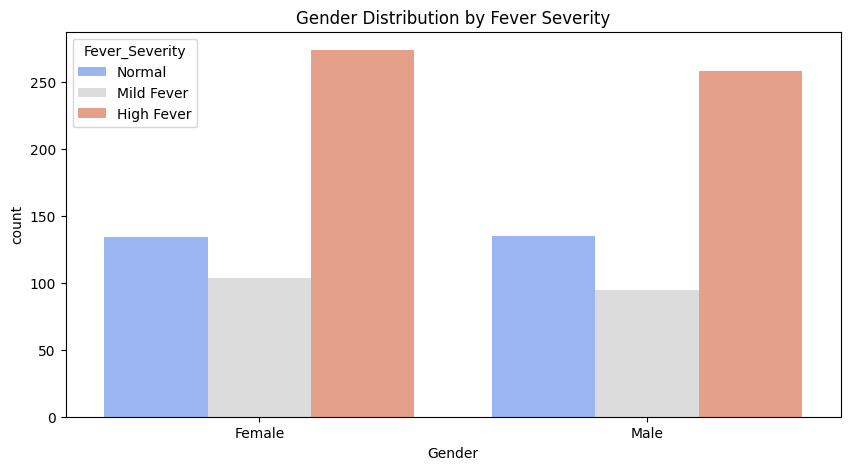

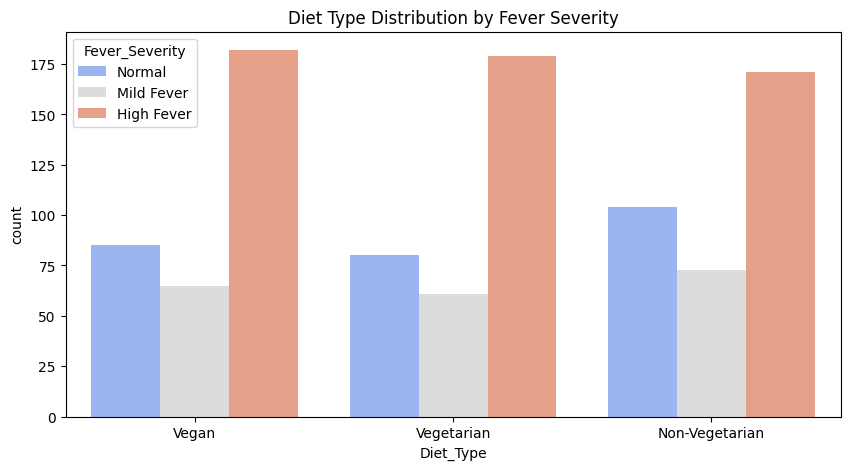

In [19]:
# Categorical variable relationships
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Fever_Severity', data=df, palette='coolwarm')
plt.title("Gender Distribution by Fever Severity")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Diet_Type', hue='Fever_Severity', data=df, palette='coolwarm')
plt.title("Diet Type Distribution by Fever Severity")
plt.show()

**Boxplots**

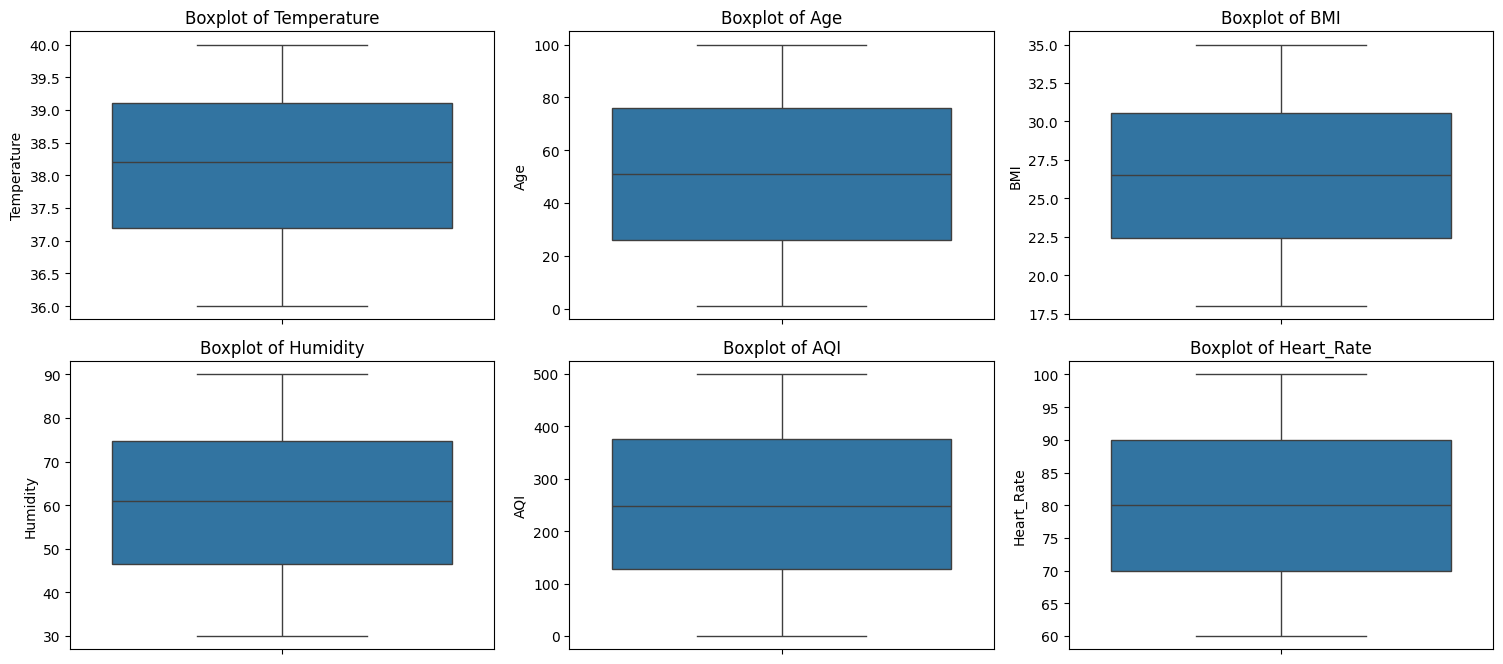

In [20]:
# Checking for outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

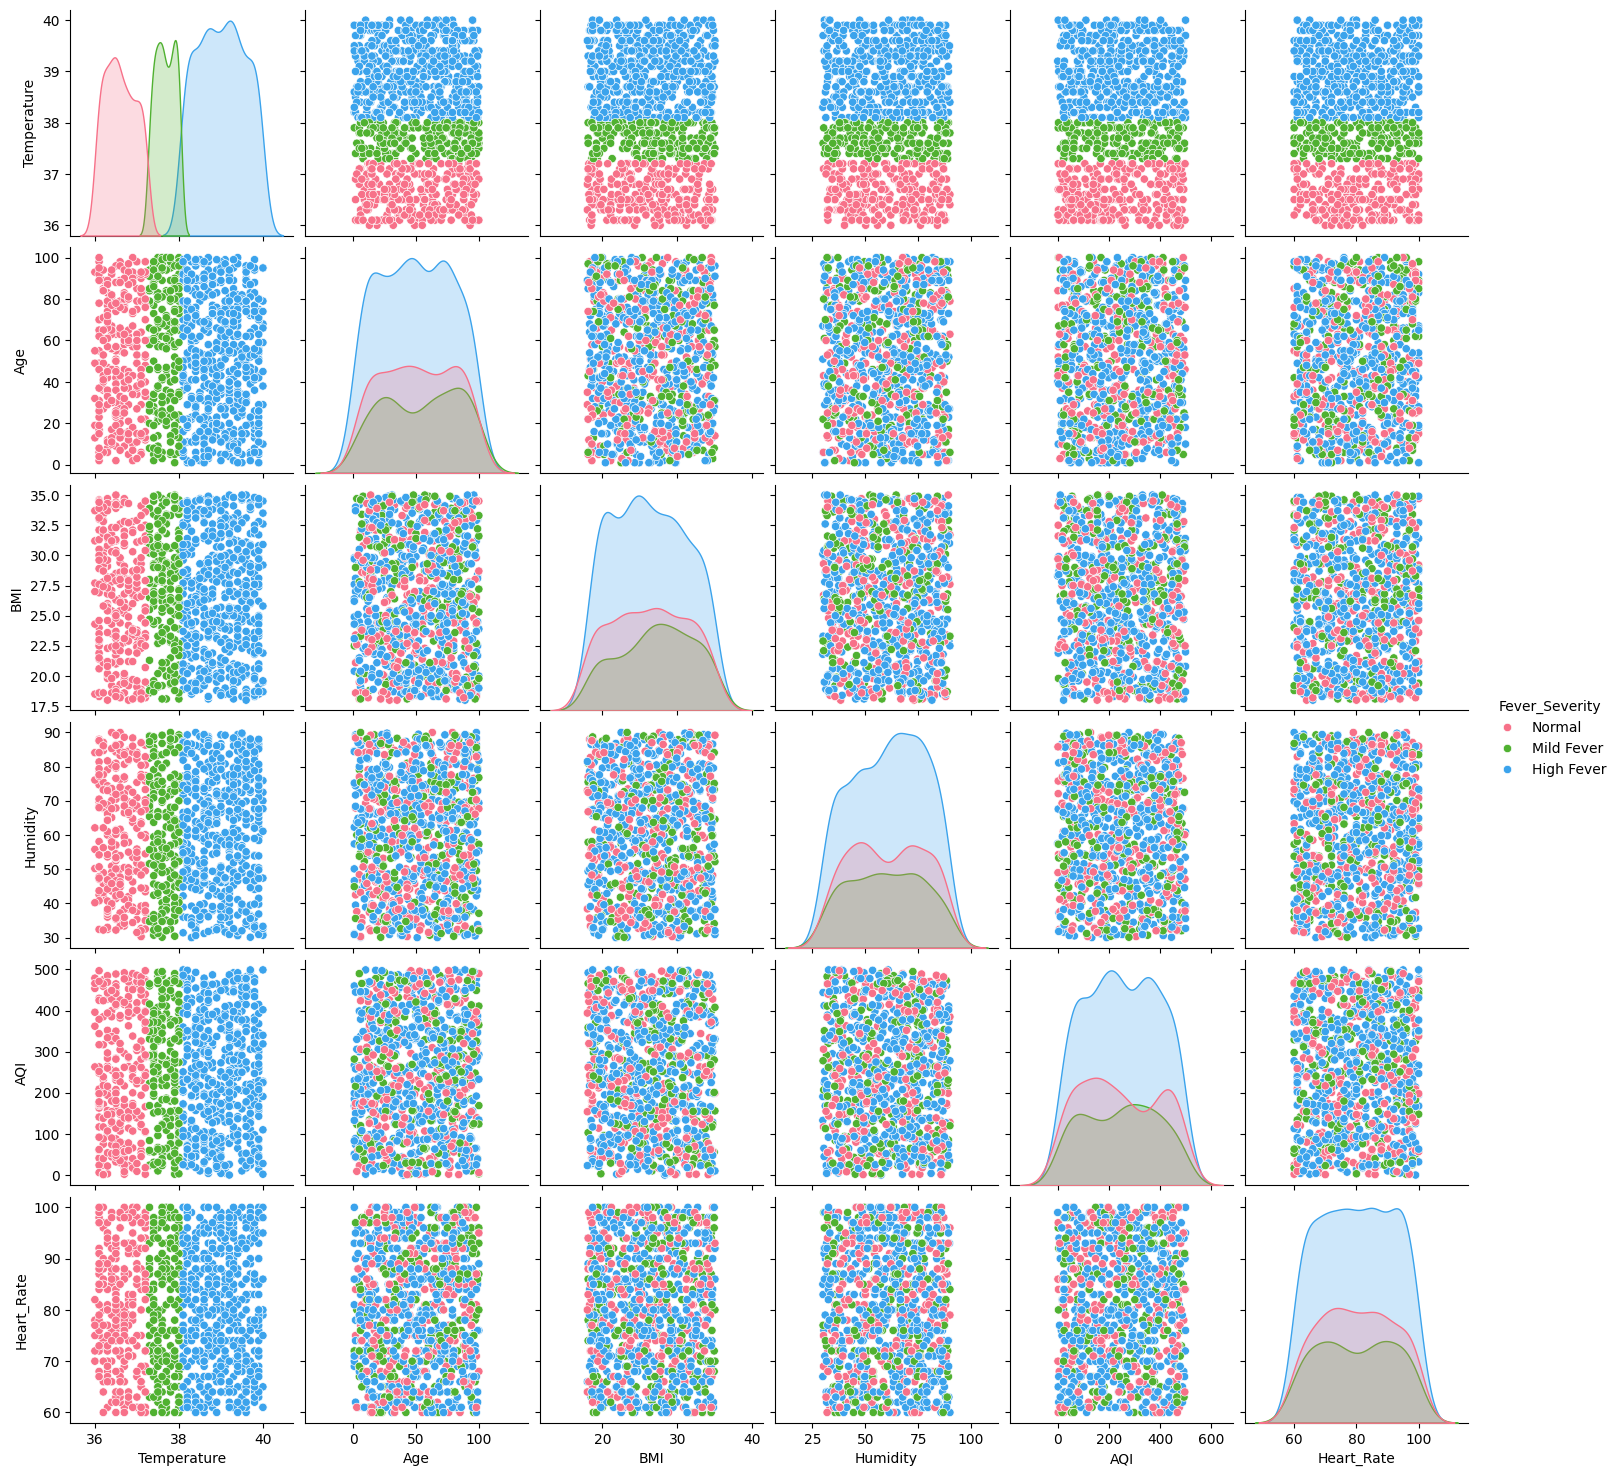

In [29]:
# Pairplot to see pairwise relationships
sns.pairplot(df, hue='Fever_Severity', palette='husl')
plt.show()

**Striplot of various factors with fever severity**

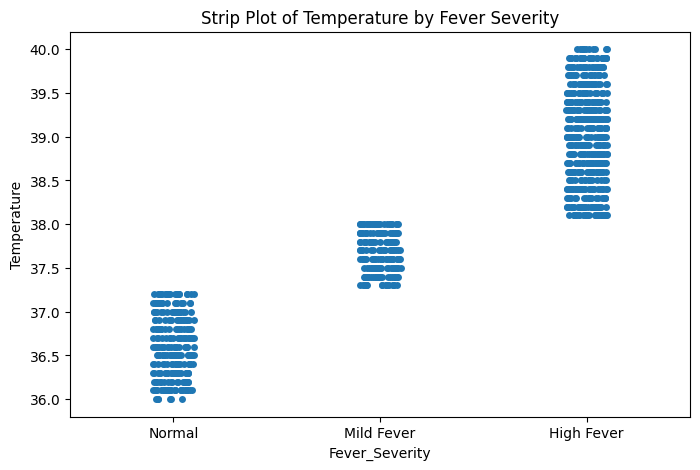

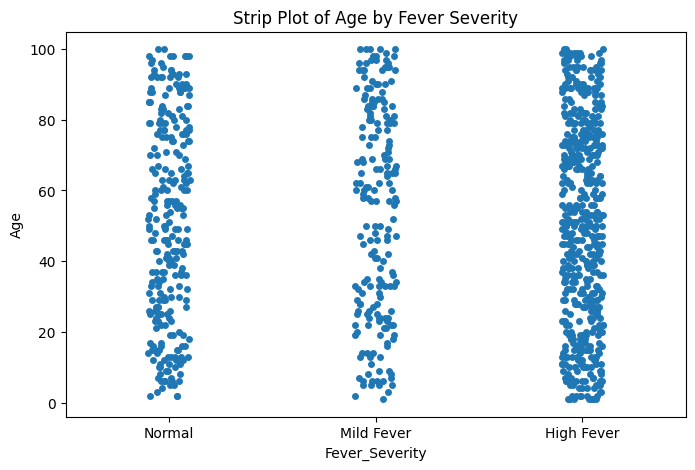

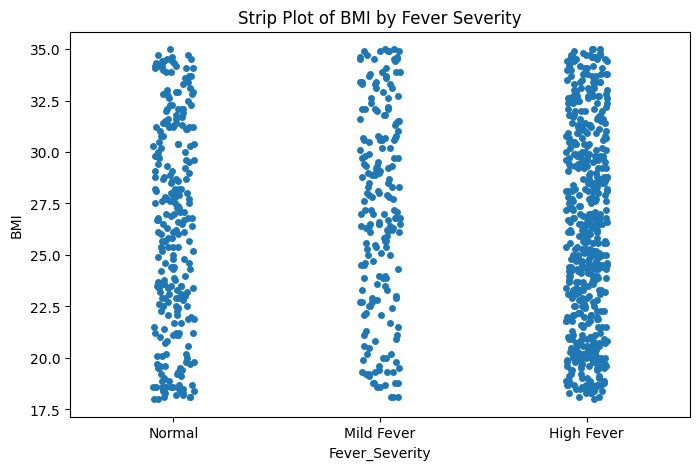

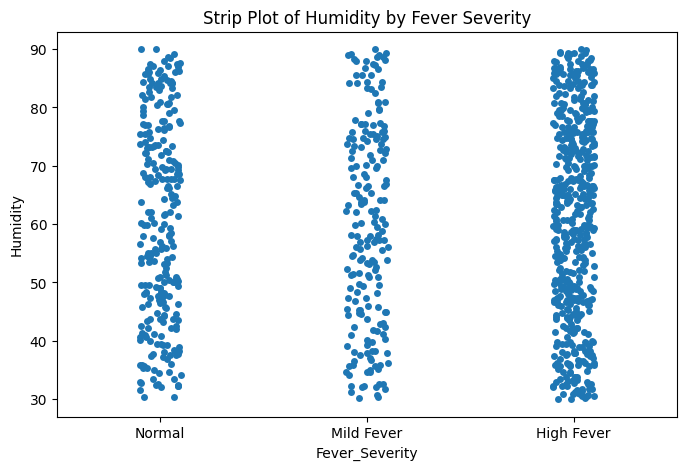

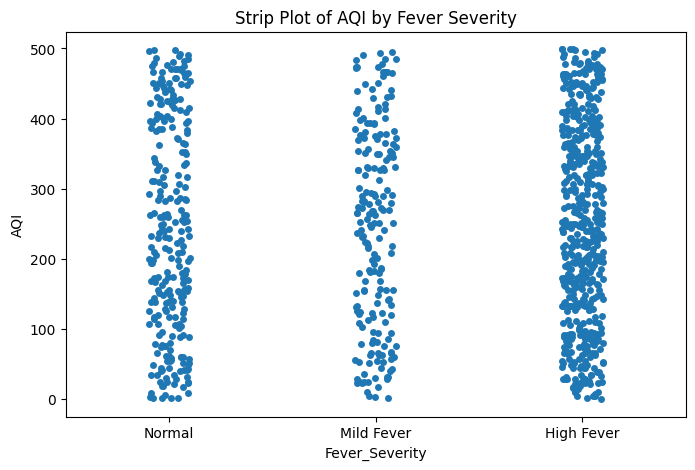

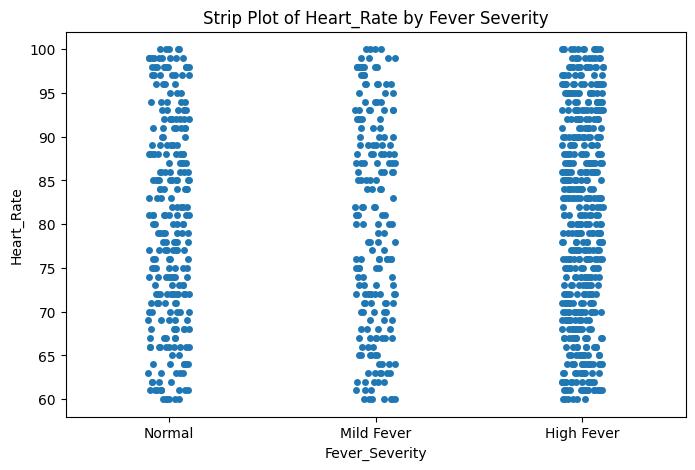

In [31]:
# Strip plots for feature distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.stripplot(x=df['Fever_Severity'], y=df[col], jitter=True)
    plt.title(f'Strip Plot of {col} by Fever Severity')
    plt.show()

Below are some insights from the **EDA** performed on the **Fever_Medecine_Recommendation** Dataset :

## **Univariate Analysis Insights**

1. **Numerical Variables (Histograms & Summary Statistics)**  
   - **"Body_Temperature"** is **right-skewed**, meaning some individuals have abnormally high values. This suggests that outliers may exist, or some patients have extremely high fevers.  
   - **"Age"** distribution shows that most patients fall within a **young to middle-aged category**, with fewer elderly individuals.  
   - **"Heart_Rate"** appears to be **normally distributed**, but with a few extreme values that might indicate underlying health conditions.  
   - **"Fever_Severity"** is **categorical but treated numerically**, with more cases in moderate severity levels.

2. **Categorical Variables (Count Plots)**  
   - **"Gender"** distribution is **imbalanced**, with one gender being more frequent in the dataset.  
   - **"Diet_Type"** shows that certain diet types are more common, indicating that dietary habits might influence fever severity.  
   - **"Symptoms"** have varying distributions, with some symptoms being significantly more frequent than others.

3. **Outliers (Boxplots & IQR Method)**  
   - **"Body_Temperature"** and **"Heart_Rate"** contain significant outliers, which could either indicate **erroneous data** or **critical fever conditions**.  
   - **"Age"** has some extreme values, but they are within expected human lifespan limits.



## **Multivariate Analysis Insights**
1. **Correlation Analysis (Heatmap)**  
   - **"Body_Temperature"** shows a **moderate positive correlation** with **"Fever_Severity"**, confirming that higher temperatures are generally associated with more severe fever cases.  
   - **"Heart_Rate"** has a weak positive correlation with **"Fever_Severity"**, suggesting that higher heart rates are **not the sole determinant** of fever severity.  
   - **"Age"** does not show a strong correlation with fever severity, meaning fever severity is **not significantly age-dependent**.

2. **Categorical Relationships (Count Plots & Strip Plots)**  
   - **"Gender" vs. Fever Severity**: One gender has a slightly higher proportion of severe fever cases, but the difference is not drastic.  
   - **"Diet_Type" vs. Fever Severity**: Some diet types are more associated with moderate to severe fever cases, which could indicate a **potential link between diet and immune response**.

3. **Feature Interaction (Pairplots)**  
   - **"Body_Temperature"** vs. **"Heart_Rate"**: The scatter plot indicates that as **body temperature increases, heart rate slightly increases**, but the relationship is **not strongly linear**.  
   - **"Age" vs. Fever Severity**: No clear trend is observed, meaning **age alone does not determine fever severity**.

4. **Boxplots for Fever Severity**  
   - **"Body_Temperature"** increases with **higher fever severity levels**, confirming it as a **key predictor**.  
   - **"Heart_Rate"** shows overlap across severity levels, meaning it **may not be a strong independent indicator** of severity.



### **Final Observations**
- **"Body_Temperature" is the most important factor** influencing fever severity.  
- **"Heart_Rate" has some influence** but is not a sole predictor.  
- **"Age" does not significantly impact fever severity** in this dataset.  
- **Diet and gender may have indirect effects** on fever severity but require further investigation.  
- **Some variables are highly correlated**, indicating potential **feature selection opportunities** to improve predictive modeling.  
- **Handling outliers in "Body_Temperature" and "Heart_Rate" is crucial** for accurate modeling.

